# Spam Detection
For detecing a message is a spam message or a Ham message.

In [56]:
# Importing data
import nltk
import numpy as np
import pandas as pd

data = pd.read_csv('spam_Ham_Data.csv',encoding='ISO-8859-1')
data.sample(7)
# Produces Random 7 samples of the data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3450,ham,Yes we were outside for like 2 hours. And I ca...,NaN,NaN,NaN
1938,ham,Excellent! Are you ready to moan and scream in...,NaN,NaN,NaN
961,spam,URGENT! We are trying to contact U. Todays dra...,NaN,NaN,NaN
1240,ham,Oh yes I can speak txt 2 u no! Hmm. Did u get ...,NaN,NaN,NaN
4227,ham,Have you started in skye,NaN,NaN,NaN
539,ham,"I am in tirupur da, once you started from offi...",NaN,NaN,NaN
1577,ham,Remember all those whom i hurt during days of ...,NaN,NaN,NaN


## Data Cleaning

In [57]:
data.shape

(5572, 5)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [59]:
# Dropping the last 3 useless columns
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)
data.sample(7)

,v1,v2
704,ham,True dear..i sat to pray evening and felt so.s...
223,ham,U say leh... Of course nothing happen lar. Not...
4422,ham,alright. Thanks for the advice. Enjoy your nig...
4867,ham,"Watching cartoon, listening music &amp; at eve..."
2243,ham,Boo I'm on my way to my moms. She's making tor...
2824,spam,Congratulations - Thanks to a good friend U ha...
4305,ham,Awww dat is sweet! We can think of something t...


In [60]:
data.shape

(5572, 2)

In [61]:
data.rename(columns={'v1':'class','v2':'text'}, inplace=True)
data.head(7)

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...


### Applying label 

In [62]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [63]:
data['class'] = encode.fit_transform(data['class'])
data.head()

# We are getting 0-> Ham, 1-> Spam

,class,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [64]:
# Calculting Null Values
data.isnull().sum()

class    0
text     0
dtype: int64

In [65]:
# Checking the Duplicated values
data.duplicated().sum()

403

In [66]:
# Dropping duplicates
data.drop_duplicates(keep='last', inplace=True)

Data is almost clean as we require it.<br>
No Null, No Duplicates, Correct format

## EDA - Data Analysis

Whenever we are working on a supervised learning model we need to have the idea related to the data<br>
So EDA becomes so imp

In [67]:
data['class'].value_counts() 

class
0    4516
1     653
Name: count, dtype: int64

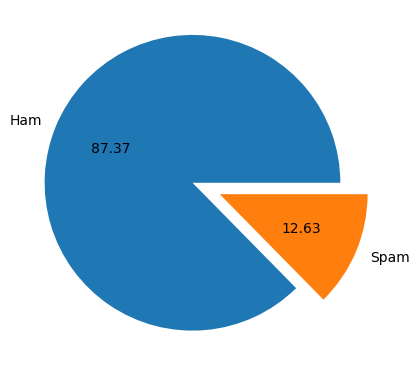

In [68]:
# Expressing it in Pie chart
import matplotlib.pyplot as plt
plt.pie(data['class'].value_counts(), labels=['Ham','Spam'], explode=[0.2,0], autopct="%0.2f")
plt.show() 

In [69]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ayush\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [ ]:
# Counting the no.of char, words, sentance in message

# this returns the length of all the chr present in the text
data['char_ct'] = data.text.apply(len)
data['wrd_ct'] = data.text.apply(lambda x : len(nltk.word_tokenize(x)))
data['sent_ct'] = data.text.apply(lambda x : len(nltk.sent_tokenize(x)))

data.head(9)

In [79]:
# Checking the description of the the data -> word, sent, char...

data[['char_ct','wrd_ct','sent_ct']].describe()

,char_ct,wrd_ct,sent_ct
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


#### Description of the Spam and Ham Seprately

In [81]:
# Ham Messages

data[data['class']==0][['char_ct','wrd_ct','sent_ct']].describe()

,char_ct,wrd_ct,sent_ct
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [83]:
# Spam Message

data[data['class']==1][['char_ct','wrd_ct','sent_ct']].describe()


,char_ct,wrd_ct,sent_ct
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


### Plotting the same

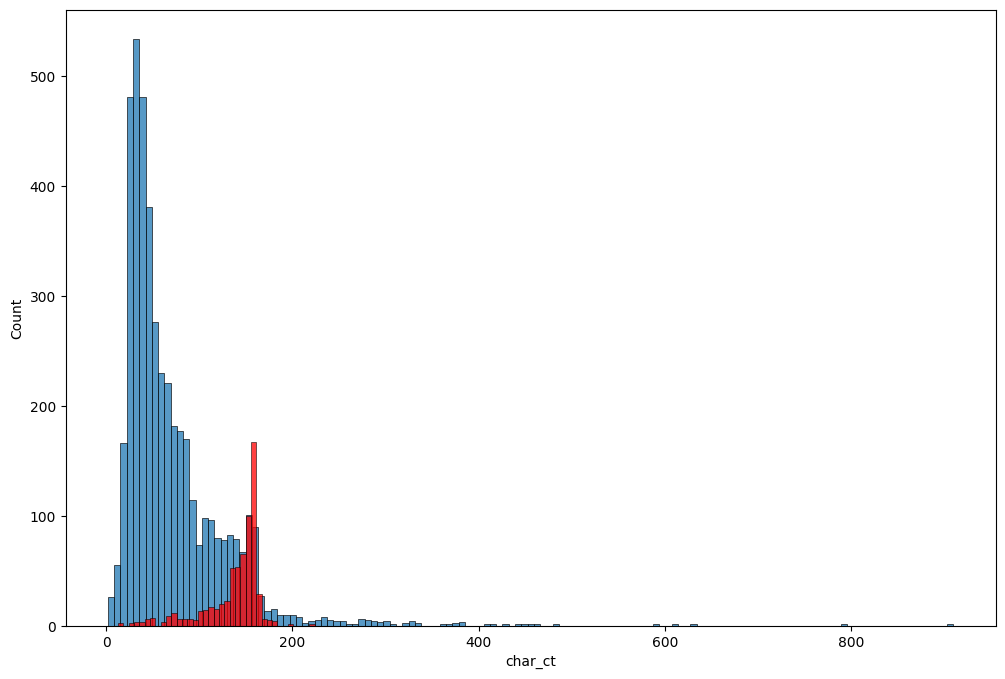

In [95]:
import seaborn as sns

plt.figure(figsize=(12,8))

# Plotting the number of character
sns.histplot(data[data['class']==0]['char_ct'])
sns.histplot(data[data['class']==1]['char_ct'], color='r')

plt.show()

# Here we can see both the classes simultemasuly

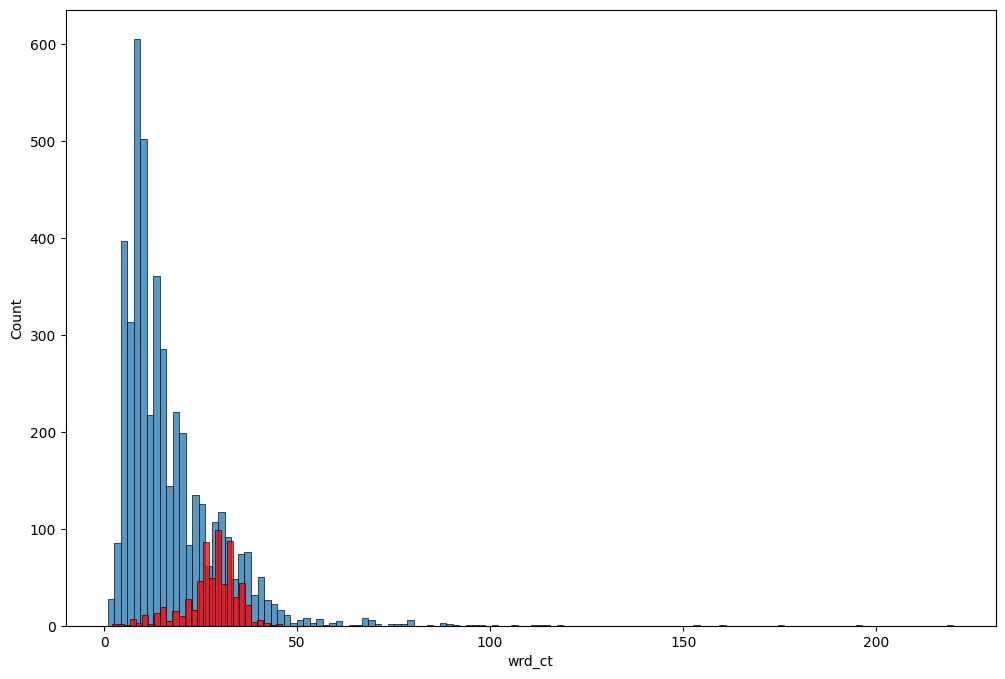

In [97]:
# Plotting the number of character
plt.figure(figsize=(12,8))

sns.histplot(data[data['class']==0]['wrd_ct'])
sns.histplot(data[data['class']==1]['wrd_ct'], color='r')

plt.show()


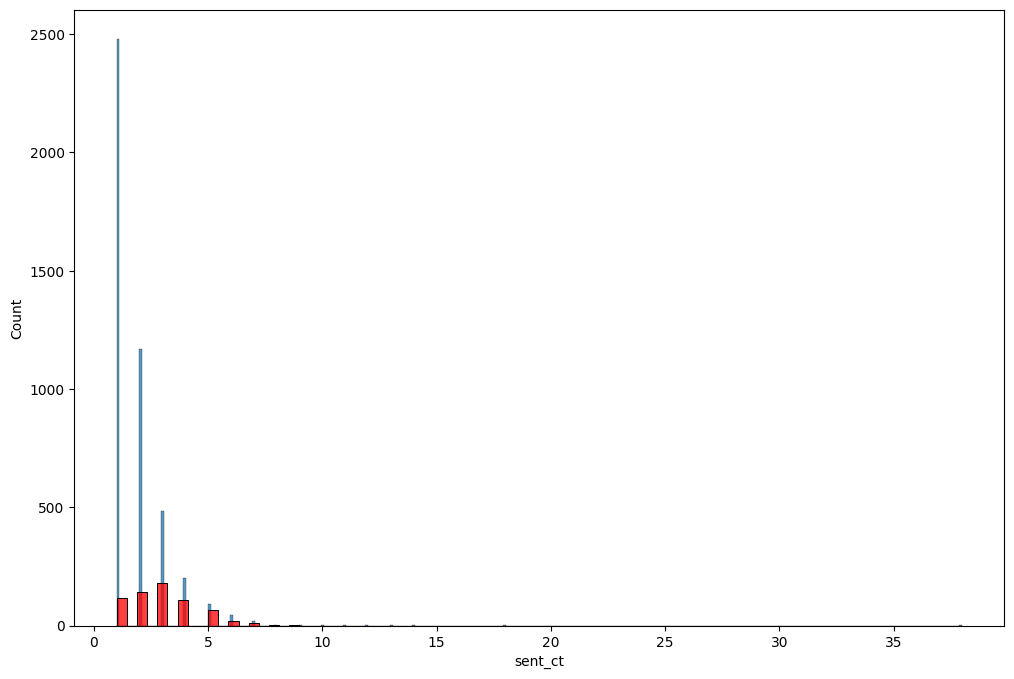

In [98]:
# Plotting the number of character
plt.figure(figsize=(12,8))

sns.histplot(data[data['class']==0]['sent_ct'])
sns.histplot(data[data['class']==1]['sent_ct'], color='r')

plt.show()


### Checking the inter column relation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


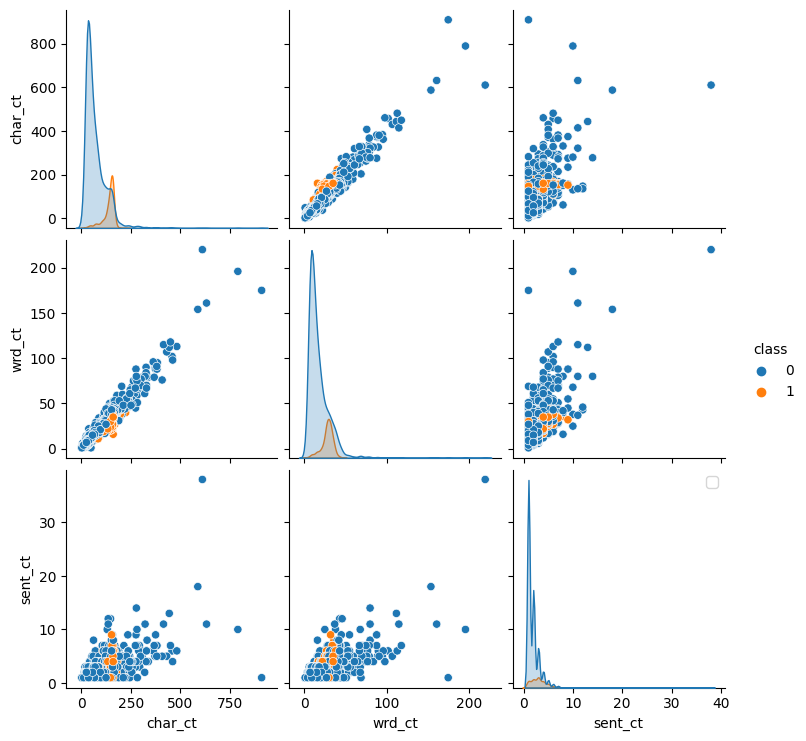

In [103]:
sns.pairplot(data, hue='class')
plt.legend()
plt.show()
# Hue= -> Coloring on the basis of the class

<Axes: >

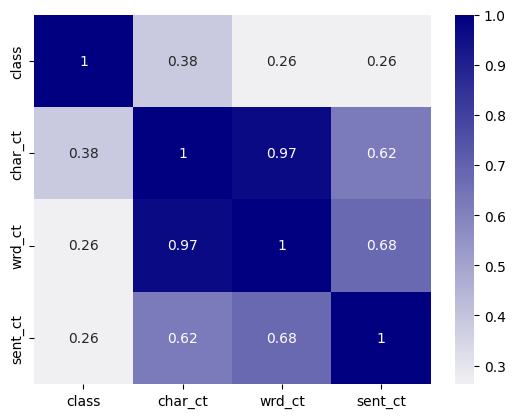

In [122]:
# Making HeatMap of the co-relattion
cplt = sns.light_palette('Navy', as_cmap = True)
sns.heatmap(data.drop(['text'],axis=1).corr(), cmap=cplt, annot = True)

Since all 3 have very strong co-relation among themseves. So we are going to keep only one of the column.

Between the 3 the heightest corr that posses with the class is char_ct so this would be the selection.